<a href="https://colab.research.google.com/github/easypanda/Handson-ML2/blob/master/MNIST_dataset_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

In [ ]:
import psutil

In [25]:
psutil.virtual_memory()

svmem(total=13655232512, available=12176592896, percent=10.8, used=4950679552, free=6601474048, active=1344995328, inactive=5447536640, buffers=75153408, cached=2027925504, shared=901120, slab=164110336)

In [30]:
psutil.cpu_count()

2

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['split', 'uniform']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.
Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [ ]:
#Importing the librairies

import os
import tarfile
import urllib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Only for jupyter notebooks
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml("mnist_784")#,version=1)
mnist.keys()

In [27]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X, y = mnist["data"], mnist["target"]

In [28]:
X.shape #Number of rows and number of features.
y.shape #Number of rows, the label of each picture

(70000,)

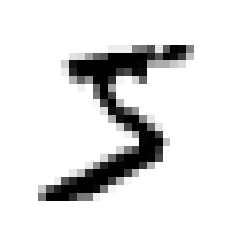

'5'

In [33]:
random_digit = X[0]
random_digit_image = random_digit.reshape(28,28) #Reshaping the image to be seen with matplotlib.
plt.imshow(random_digit_image,cmap="binary")
plt.axis("off")
plt.show()

#Comparing to the label
y[0]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV
from sklearn.metrics import confusion_matrix,\
                            classification_report,\
                            precision_score,\
                            accuracy_score,\
                            recall_score,\
                            roc_auc_score,\
                            roc_curve,\
                            f1_score
#Using the Sklearn visualization API...
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall,plot_roc_curve

In [ ]:
#We split the data with a stratified split
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(X,y):
    train_set = X[train_index],y[train_index]
    test_set = X[test_index],y[test_index]

In [ ]:
x_train = train_set[0]
y_train = train_set[1]

x_test = test_set[0]
y_test = test_set[1]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

In [ ]:
Model = Pipeline([
    ("std",StandardScaler()),
    ("Trucated",TruncatedSVD(n_components=100)),
    ('Knn',KNeighborsClassifier())
                            ])

In [ ]:
n_neighbors = sp_randint(10, 15)
weights = ['uniform', 'distance']
leaf_size = sp_randint(30,60)

In [ ]:
random_search = {
                'Knn__n_neighbors': n_neighbors,
                'Knn__weights':weights,
                'Knn__leaf_size': leaf_size
                }

In [ ]:
SVC_KNN = RandomizedSearchCV(Model,param_distributions=random_search,n_iter=10,n_jobs=-1,verbose=10)
SVC_KNN.fit(x_train,y_train)
print(f"Our best parameters: {SVC_KNN.best_params_}")
print(f"Our best estimator: {SVC_KNN.best_estimator_}")
print(f"Our best score: {SVC_KNN.best_score_}")

In [ ]:
def print_metrics(predicted_y,y_test):   
    print("\n")
    print(f"Accuracy Score : {(accuracy_score(predicted_y,y_test))}")
    print(f"Precision Score : {(precision_score(predicted_y,y_test,average=None))}")
    print(f"Recall Score : {(recall_score(predicted_y,y_test,average=None))}")
    print(f"F1 Score : {(f1_score(predicted_y,y_test,average=None))}")
    print("\n")
    print(plot_confusion_matrix(predicted_y,y_test))
    print(f"{classification_report(predicted_y,y_test)}")

In [ ]:
predicted_y = SVC_KNN.predict(x_test)



Accuracy Score : 0.9557857142857142
Precision Score : [0.99275887 0.98920635 0.94635193 0.94817927 0.94139194 0.93343899
 0.98109091 0.94722413 0.93333333 0.93893678]
Recall Score : [0.96685472 0.96710118 0.96710526 0.95419309 0.9712774  0.95076675
 0.96357143 0.94463431 0.95430712 0.91783708]
F1 Score : [0.97963558 0.97802888 0.95661605 0.95117668 0.95610119 0.94202319
 0.97225225 0.94592745 0.9437037  0.92826705]


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1418
           1       0.99      0.97      0.98      1611
           2       0.95      0.97      0.96      1368
           3       0.95      0.95      0.95      1419
           4       0.94      0.97      0.96      1323
           5       0.93      0.95      0.94      1239
           6       0.98      0.96      0.97      1400
           7       0.95      0.94      0.95      1463
           8       0.93      0.95      0.94      1335


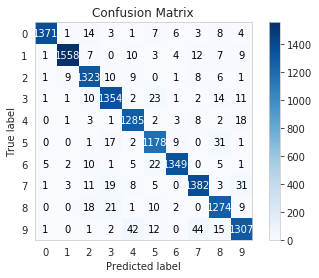

In [44]:
print_metrics(predicted_y,y_test)

## Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.

In [ ]:
def shift_img(img,direction):
    
    if direction == "up":
        img_copy = np.roll(img, -1, axis=0).reshape(784,) # up
    elif direction == "down":
        img_copy = np.roll(img, 1, axis=0).reshape(784,) # down
    elif direction == "right":    
        img_copy = np.roll(img.reshape(28,28), 1, axis=1).reshape(784,) # right
    elif direction == "left":
        img_copy = np.roll(img.reshape(28,28), -1, axis=1).reshape(784,) # left
    
    return img_copy

In [ ]:
img_shifted = shift_img(random_digit,"up")

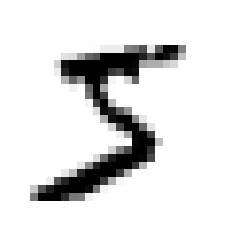

In [47]:
#To plot the img
plt.imshow(img_shifted.reshape(28,28),cmap="binary")
plt.axis("off")
plt.show()

## Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set.

In [ ]:
#We create two new lists for the storing the new data and new label
new_data = []
new_label = []

for i in np.arange(0,len(x_train)-1): #Creation of a pointer for the iteration on the dataset
    label = y_train[i]
    
    
    img_shifted = shift_img(x_train[i],"up")
    
    new_data.append(img_shifted) #Appending the new_data list with the new image created
    new_label.append(label) #Appending the new_label list with the new label created
    
    img_shifted = shift_img(x_train[i],"down")
    new_data.append(img_shifted)
    new_label.append(label)

              
    img_shifted = shift_img(x_train[i],"left")
    new_data.append(img_shifted)
    new_label.append(label)

              
    img_shifted = shift_img(x_train[i],"right")
    new_data.append(img_shifted)
    new_label.append(label)
    
x_train_augmented = list(x_train.copy())
x_train_augmented.extend(new_data) #Concatenate all the images
del new_data
x_train_augmented = np.asarray(x_train_augmented)
y_train_augmented = y_train.astype(np.int)
new_label = np.asarray(new_label).astype(np.int)
y_train_augmented = np.append(y_train_augmented , new_label) #Concatenate all the labels
del new_label

In [49]:
print(x_train_augmented.shape)
print(y_train_augmented.shape)

(279996, 784)
(279996,)


## Finally, train your best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [50]:
SVC_KNN.best_params_

{'Knn__leaf_size': 51, 'Knn__n_neighbors': 10, 'Knn__weights': 'distance'}

In [ ]:
param = SVC_KNN.best_params_
param["Knn__n_jobs"] = -1

In [ ]:
#Creation of the pipeline with the best parameters
best_model = Pipeline([
    ("std",StandardScaler()),
    ("Trucated",TruncatedSVD(n_components=100)),
    ('Knn',KNeighborsClassifier())
                            ])

In [53]:
#Setting the best parameters
best_model.set_params(**param)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Trucated',
                 TruncatedSVD(algorithm='randomized', n_components=100,
                              n_iter=5, random_state=None, tol=0.0)),
                ('Knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=51,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=10, p=2,
                                      weights='distance'))],
         verbose=False)

In [54]:
#We fit the newly created data
best_model.fit(x_train_augmented,y_train_augmented)

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Trucated',
                 TruncatedSVD(algorithm='randomized', n_components=100,
                              n_iter=5, random_state=None, tol=0.0)),
                ('Knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=51,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=10, p=2,
                                      weights='distance'))],
         verbose=False)

In [ ]:
#And we predict the results!
predicted_y = best_model.predict(x_test)

In [57]:
predicted_y

array([7, 3, 1, ..., 6, 2, 8])

In [ ]:
y_test = y_test.astype(np.int)



Accuracy Score : 0.9652142857142857
Precision Score : [0.99131064 0.99238095 0.95994278 0.96288515 0.95531136 0.95562599
 0.98254545 0.96367375 0.93626374 0.94755747]
Recall Score : [0.9764622  0.97020484 0.97956204 0.96355992 0.97897898 0.9648
 0.96293656 0.96038251 0.96598639 0.93018336]
F1 Score : [0.9838304  0.98116761 0.96965318 0.96322242 0.96700037 0.96019108
 0.97264219 0.96202532 0.95089286 0.93879004]


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1402
           1       0.99      0.97      0.98      1611
           2       0.96      0.98      0.97      1370
           3       0.96      0.96      0.96      1427
           4       0.96      0.98      0.97      1332
           5       0.96      0.96      0.96      1250
           6       0.98      0.96      0.97      1403
           7       0.96      0.96      0.96      1464
           8       0.94      0.97      0.95      1323
    

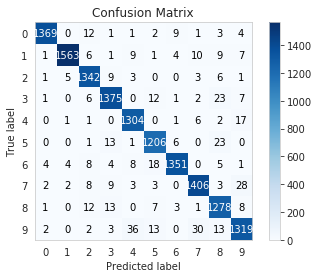

In [62]:
print_metrics(predicted_y,y_test)